<a href="https://colab.research.google.com/github/Hari-385/Prodigy-_internship/blob/main/Prodigy_task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving test.csv to test (10).csv


<ipython-input-14-506709e94984>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment_category', palette='viridis')


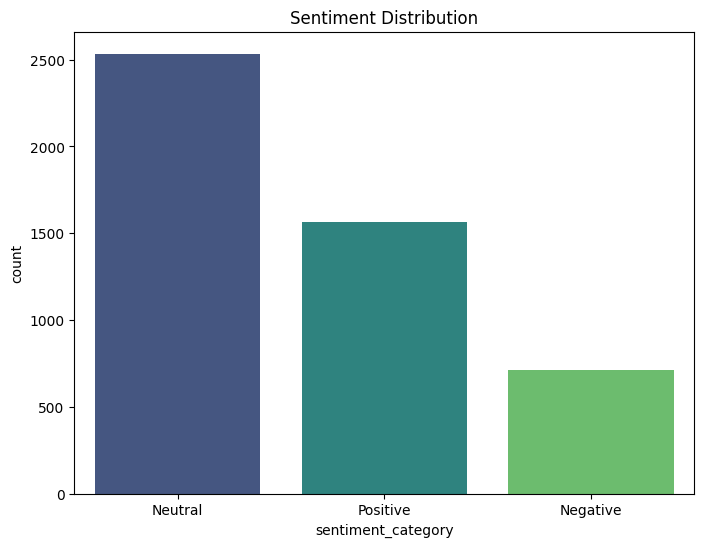

<ipython-input-14-506709e94984>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Age of User', y='sentiment', palette='coolwarm', order=valid_age_labels)


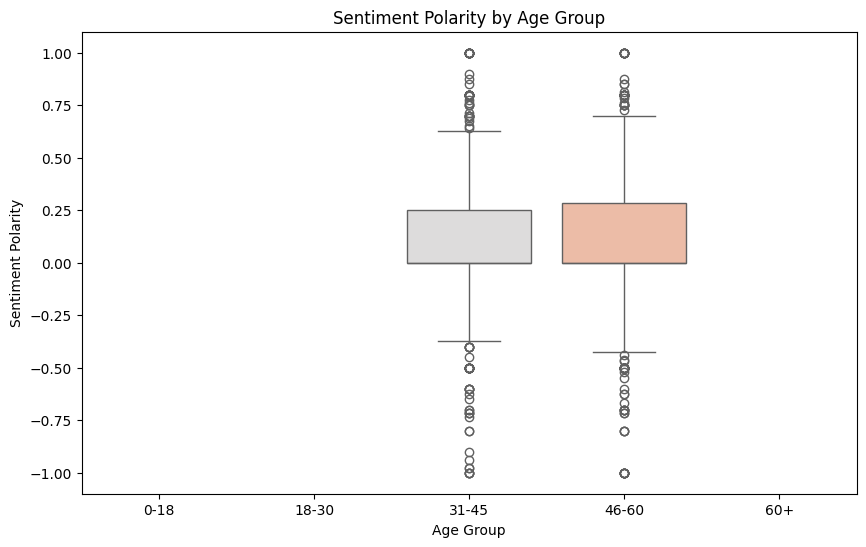

Average Sentiment Polarity by Age Group:
  Age of User  sentiment
0        0-18        NaN
1       18-30        NaN
2       31-45   0.088104
3       46-60   0.096160
4         60+        NaN


In [14]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from google.colab import files

# Upload file
uploaded = files.upload()

# Read uploaded file with a specified encoding
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename, encoding='ISO-8859-1')  # Change encoding if needed

# Display the first few rows of the dataset
data.head()

# Add a 'sentiment' column using TextBlob's polarity score
def get_sentiment(text):
    blob = TextBlob(str(text))
    return blob.sentiment.polarity  # Range -1 (negative) to 1 (positive)

data['sentiment'] = data['text'].apply(get_sentiment)

# Categorize sentiment as Positive, Neutral, or Negative
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment_category'] = data['sentiment'].apply(categorize_sentiment)

# Display sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='sentiment_category', palette='viridis')
plt.title('Sentiment Distribution')
plt.show()

# Ensure the 'Age of User' column has valid labels (e.g., '18-30')
valid_age_labels = ['0-18', '18-30', '31-45', '46-60', '60+']
data = data[data['Age of User'].isin(valid_age_labels)]

# Plot sentiment polarity by age group (assuming 'Age of User' has values like '18-30')
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Age of User', y='sentiment', palette='coolwarm', order=valid_age_labels)
plt.title('Sentiment Polarity by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Sentiment Polarity')
plt.show()

# Analyze average sentiment by age group
avg_sentiment_by_age = data.groupby('Age of User')['sentiment'].mean().reindex(valid_age_labels).reset_index()
print("Average Sentiment Polarity by Age Group:")
print(avg_sentiment_by_age)